##Crop Recommendations🌾🌾🌾 RandomForestClassifier,GaussianNB,ExtraTreesClassifier,DecisionTreeClassifier🌎


<div style="text-align: center;">
    <img src="https://i.postimg.cc/sg9PCy3p/Leonardo-Phoenix-09-An-artistic-representation-of-a-machine-le-1.jpg" alt="alzheimers" style="width: 120%; height: auto; border-radius: 30px;">
</div>



# **RandomForestClassifier**


   <p>The `RandomForestClassifier` is a machine learning algorithm used for classification. It creates many decision trees during training and then makes predictions based on the majority vote of these trees. Each tree is trained on a random part of the data and considers a random selection of features when making decisions. This randomness helps the model make better predictions and reduces overfitting. It's a powerful and flexible model that works well for many types of data.

<div style="text-align: center;">
    <img src="https://i.postimg.cc/Nf0hPMbh/Leonardo-Phoenix-09-An-illustration-of-a-Random-Forest-Classifie-2.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>


#  **Gaussian Naive**

The Gaussian Naive Bayes (GaussianNB) classifier is based on Bayes' Theorem and assumes that the features follow a Gaussian (normal) distribution. It is used for classification tasks, especially when the features are continuous and normally distributed.



<div style="text-align: center;">
    <img src="https://i.postimg.cc/cJybZ47L/Leonardo-Phoenix-09-An-abstract-representation-of-a-Gaussian-N-2.jpg" style="width:100%; height:auto; border-radius: 30px;">
</div>


# **Extra Trees Classifier**

The Extra Trees Classifier is an ensemble learning algorithm that builds many decision trees with random feature selections at each node and uses the majority vote for classification. It is designed to be more random and diverse compared to traditional decision trees.

<div style="text-align: center;">
    <img src="https://i.postimg.cc/QN4YCqgP/Leonardo-Phoenix-09-An-artistic-depiction-of-an-Extra-Trees-Cl-1.jpg" style="width:100%; height:auto; border-radius: 30px;">
</div>

# **Decision Tree Classifier**

The Decision Tree Classifier is a machine learning algorithm that splits data into branches based on feature values, creating a tree-like structure. It makes decisions by traversing from the root to the leaves, where each leaf represents a classification outcome.

<div style="text-align: center;">
    <img src="https://i.postimg.cc/VNmWDSBn/Leonardo-Phoenix-09-An-illustration-of-a-decision-tree-with-cl-3.jpg" style="width:100%; height:auto; border-radius: 30px;">
</div>

##  **Life Expectancy using Linear, Ridge and Lasso Regression ( Code ) 🌎**

# Sections     :

* [1. Problem formulation](#1)
* [2. Finding data](#2)
* [3. Exploring insights in data or EDA :](#3)
* [4. Data preprocessing](#4)
    * [4.1 data processing  ](#2.1)
    * [4.2 handling missing values ](#2.2)
    * [4.3 Encoding categorical features](#2.3)
    * [4.4 Scaling Numerical features](#2.4)
* [5. Training and Evaluating models](#5)


<a name='1'></a>


<a name='1'></a>
##  ***1. Problem formulation :***


The dataset is related to crop recommendations based on environmental and soil conditions. The primary task is to develop a machine learning model to predict the most suitable crop to grow in a specific setting.




---





 **Objective:**
To build a predictive model that accurately suggests the most suitable crop for a given set of environmental (e.g., temperature, humidity) and soil conditions (e.g., N, P, K, pH, rainfall).


---


Fortunately, there is dataset [on Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data) that you can use to learn

<a name='2'></a>
##  ***2. Finding data :***

**there is this dataset : [on Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data)**



| **Field**      | **Description**                                                                                  |
|-----------------|-----------------------------------------------------------------------------------------------|
| **N**          | Nitrogen content in the soil.                                                                 |
| **P**          | Phosphorus content in the soil.                                                               |
| **K**          | Potassium content in the soil.                                                                |
| **temperature**| Temperature of the environment in degrees Celsius.                                            |
| **humidity**   | Humidity in the environment (percentage).                                                     |
| **ph**         | pH level of the soil (acidity or alkalinity).                                                 |
| **rainfall**   | Annual rainfall in millimeters.                                                               |
| **label**      | Suggested crop to be grown under the given conditions.                                        |


**import all needed libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
%matplotlib inline

**Let's download the data :**

In [ ]:
data = pd.read_csv('/content/Crop_recommendation.csv')

**Show data Set**

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


 **get info about this data :**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
print(data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


<a name='3'></a>
##  ***3. Exploring insights in data or EDA :***

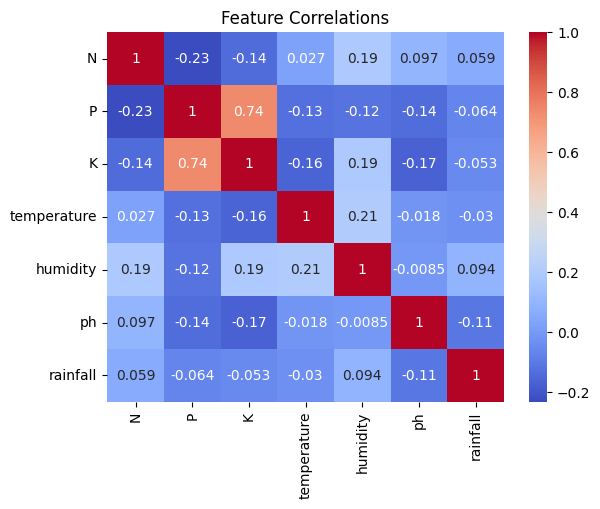

In [ ]:
data_cmap = data.drop('label', axis=1)
sns.heatmap(data_cmap.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


**make count plot for each object coulmn :**

<ipython-input-9-48b48e5ef803>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


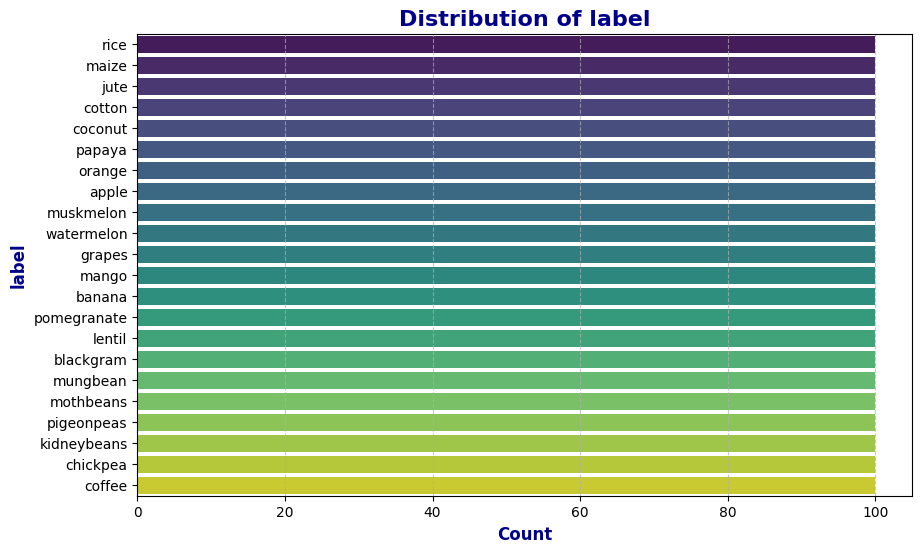

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each object (categorical) column in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        y=data[column],
        order=data[column].value_counts().index,
        palette="viridis"
    )
    plt.title(f"Distribution of {column}", fontsize=16, fontweight="bold", color="darkblue")
    plt.xlabel("Count", fontsize=12, fontweight="bold", color="darkblue")
    plt.ylabel(column, fontsize=12, fontweight="bold", color="darkblue")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


<a name='4'></a>
##  ***4. Data preprocessing :***

<a name='2.1'></a>
## 4.1 data processing

<a name='2.2'></a>
## 4.2 handling missing values

In [ ]:
if data.isnull().sum().sum() > 0:
    data.fillna(data.median(), inplace=True)


<a name='4.3'></a>
## 2.3 Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming `data` is your DataFrame
data = pd.read_csv('/content/Crop_recommendation.csv')

# Step 1: Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Step 2: Save the LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Continue with the rest of your code


In [101]:
# Check the classes the label_encoder was trained on
print(label_encoder.classes_)


['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [103]:
from sklearn.preprocessing import LabelEncoder

# Create a new LabelEncoder
label_encoder = LabelEncoder()

# List of possible labels (replace with your actual labels)
labels = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
          'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
          'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
          'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

# Fit the LabelEncoder
label_encoder.fit(labels)

# Save the trained LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

print("LabelEncoder saved successfully!")



LabelEncoder saved successfully!


<a name='5'></a>
##  ***5. Training and Evaluating models :***

**Divde data to train and labels :**

In [ ]:
X = data.drop('label', axis=1)
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Split data to Train and Test :**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train And Evalute Models :**

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Example models dictionary (assuming you've already imported all necessary classifiers)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

# Results list
results = []

# Loop over models to train and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and manually compute RMSE
    mse = mean_squared_error(y_test, prediction)
    rmse = mse ** 0.5  # Taking the square root of MSE to get RMSE

    # Calculate R2 Score
    r2 = r2_score(y_test, prediction)

    # Store results
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                  Model      RMSE  R2 Score
0   Logistic Regression  1.916436  0.913223
1                   SVM  1.709599  0.930944
2                   KNN  1.717556  0.930299
3         Decision Tree  1.397238  0.953873
4         Random Forest  0.821584  0.984052
5     Gradient Boosting  1.415820  0.952638
6               XGBoost  1.181294  0.967029
7        Neural Network  1.325450  0.958491
8           Naive Bayes  0.809040  0.984535
9              AdaBoost  7.527978 -0.338970
10          Extra Trees  0.833939  0.983568


In [ ]:
results_df=results_df.sort_values("R2 Score", ascending = False)
results_df

,Model,RMSE,R2 Score
8,Naive Bayes,0.809040,0.984535
4,Random Forest,0.821584,0.984052
10,Extra Trees,0.833939,0.983568
6,XGBoost,1.181294,0.967029
7,Neural Network,1.325450,0.958491
3,Decision Tree,1.397238,0.953873
5,Gradient Boosting,1.415820,0.952638
1,SVM,1.709599,0.930944
2,KNN,1.717556,0.930299
0,Logistic Regression,1.916436,0.913223


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def evaluate_models_with_kfold_optimized(data, target_col, models, n_splits=20, random_state=42, scoring='r2'):
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    model_scores = {}

    for model in models:
        # Get model name from its class name
        model_name = type(model).__name__

        if hasattr(model, 'n_jobs'):
            model.set_params(n_jobs=-1)  # Use parallel processing if supported
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=scoring)
        model_scores[model_name] = scores.mean()

    return model_scores

# Example usage with a list of models:
models = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

model_scores = evaluate_models_with_kfold_optimized(data, 'label', models)




Model: GaussianNB, Mean : 0.9840147534600827
Model: DecisionTreeClassifier, Mean : 0.9614937264165437
Model: RandomForestClassifier, Mean : 0.9873248459651907
Model: ExtraTreesClassifier, Mean : 0.9780657912719001


**Model Performance Summary**

In [ ]:
model_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Mean Score'])
model_df['Mean Score'] = model_df['Mean Score'] * 100
model_df = model_df.sort_values(by='Mean Score', ascending=False)


model_df


,Model,Mean Score
2,RandomForestClassifier,98.615453
0,GaussianNB,98.401475
3,ExtraTreesClassifier,98.375196
1,DecisionTreeClassifier,96.681172


In [ ]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Assuming `data` is your dataset
X = data.drop('label', axis=1)
y = data['label']

# Split data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to train and save
models = [
    ('GaussianNB', GaussianNB()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier())
]

# Loop through the models, train each, and save them
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model using pickle
    filename = f'{model_name}_savedmodel.sav'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model {model_name} trained and saved successfully!")


Model GaussianNB trained and saved successfully!
Model DecisionTreeClassifier trained and saved successfully!
Model RandomForestClassifier trained and saved successfully!
Model ExtraTreesClassifier trained and saved successfully!


In [ ]:
import pickle

# List of model names to load
models = [
    'GaussianNB',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'ExtraTreesClassifier'
]

# Dictionary to store the loaded models
loaded_models = {}

# Load each model from the corresponding file
for model_name in models:
    filename = f'{model_name}_savedmodel.sav'

    # Load the trained model
    with open(filename, 'rb') as file:
        loaded_model = pickle.load(file)

    # Store the loaded model in the dictionary
    loaded_models[model_name] = loaded_model

    print(f"Model {model_name} loaded successfully!")




Model GaussianNB loaded successfully!
Model DecisionTreeClassifier loaded successfully!
Model RandomForestClassifier loaded successfully!
Model ExtraTreesClassifier loaded successfully!


In [ ]:
import pickle
import numpy as np

# List of models
models = [
    'GaussianNB',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'ExtraTreesClassifier'
]

# Dictionary to store the loaded models
loaded_models = {}

# Load each model from the corresponding file
for model_name in models:
    filename = f'{model_name}_savedmodel.sav'

    with open(filename, 'rb') as file:
        loaded_model = pickle.load(file)

    # Store the loaded model in the dictionary
    loaded_models[model_name] = loaded_model
    print(f"Model {model_name} loaded successfully!")


# Example new data for prediction
new_data = np.array([[90, 42, 43, 20.88, 82.00, 6.50, 202.93]])

# Iterate over each model and make predictions
for model_name, model in loaded_models.items():
    # Prediction
    prediction = model.predict(new_data)

    # Get the predicted crop
    predicted_crop_index = prediction[0]
    predicted_crop = label_encoder.inverse_transform([predicted_crop_index])[0]

    # Print the prediction for each model
    print(f"Model: {model_name}, Predicted crop: {predicted_crop}")



Model GaussianNB loaded successfully!
Model DecisionTreeClassifier loaded successfully!
Model RandomForestClassifier loaded successfully!
Model ExtraTreesClassifier loaded successfully!
Model: GaussianNB, Predicted crop: rice
Model: DecisionTreeClassifier, Predicted crop: rice
Model: RandomForestClassifier, Predicted crop: rice
Model: ExtraTreesClassifier, Predicted crop: rice


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
